In [1]:
#import 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
#Set funcitons and their quations to be used later
def charge_on_C(qa,qb):
    qc = -(qa+qb)/3
    return qc    

#Set the function shell charge 
def shell_charge(qa,qb):
    qc = -(qa+qb)/3
    qsc = qc - 0.378
    return qsc

#Set the function of the spring constant
def spring(qsc):
    ksc = qsc**2/0.078
    return ksc




In [3]:
#Set energy values of atom B to go between parameters 1.5->2.5
qa = np.arange(0.5,1.6,0.1)
qa

array([ 0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,  1.5])

In [4]:
#Set energy values of atom B to go between parameters 1.5->2.5
qb = np.arange(1.5,2.6,0.1)
qb

array([ 1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,  2.4,  2.5])

In [5]:
#turn the above data into a list of [qa,qb,qsc,ksc]
mylist = []

for A in qa:
    for B in qb:
        qsc = shell_charge(A,B)
        ksc = spring(qsc)
        
        mylist.append([A,B,qsc,ksc])

mylist = [item[0:4] for item in mylist]




In [6]:
#Start a new loop so that you can have a single file for each of the variable qa/qb states, 
#Using "w" to write the file
#Then fill in each line with the 

for item in mylist:
    filename = open('167-Input-qa-%3.1f-qb-%3.1f.txt' %(item[0],item[1]), 'w')
    filename.write("opti prop cellonly \n")
    filename.write("cell \n")
    filename.write("6.0798 6.0798 14.7681 90.000 90.000 120.000 \n")
    filename.write("frac \n")
    filename.write("Tb  core     0.00000  0.00000  0.00000 \n")
#    filename.write("Tb  core     0.50000  0.50000  0.50000 \n")
    
    filename.write("Ba  core     0.0000 0.0000  0.2500  \n")
#    filename.write("Ba  core     0.75000  0.75000  0.75000  \n")
    
    filename.write("O   core     0.4624   0.0000   0.2500  \n")
#    filename.write("O   core     0.28760  0.21240  0.75000  \n")
#    filename.write("O   core     0.25000  0.71240  0.78760  \n")
#    filename.write("O   core     0.75000  0.28760  0.21240  \n")
#    filename.write("O   core     0.78760  0.25000  0.71240  \n")
#    filename.write("O   core     0.21240  0.75000  0.28760  \n")  

    filename.write("O   shel     0.4624   0.0000   0.2500  \n")
 
    
    filename.write("space \n")
    filename.write("167 \n")
    filename.write("species \n")
    filename.write("Tb  core %10.1f \n" % item[0])
    filename.write("Ba  core %10.1f \n" % (item[1]))
    filename.write("O   core 0.378 \n")
    filename.write("O   shel %18.12f \n" % (item[2]))
    filename.write("buckingham \n")
    filename.write("Ba  core Ba core   2189.190 0.1916   0.00 0.0 30.0 \n")
    filename.write("Tb  core O  shel   1482.300 0.2664   0.00 0.0 30.0  \n")
    filename.write("O   shel O  shel    911.690 0.2707  13.80 0.0 30.0  \n")
    filename.write("Ba   core O  shel   3521.60  0.2672   0.00 0.0 30.0 \n")
    filename.write("spring \n")
    filename.write("O   %10.3f \n" % item[3])
    filename.write("output cif perov.cif \n")
    filename.close()

In [7]:
qa = np.arange(0.5,1.6,0.1)
qb = np.arange(1.5,2.6,0.1)
for i in qa:
    for j in qb:
        cmd = 'gulp < 167-Input-qa-%3.1f-qb-%3.1f.txt > out-qa-%3.1f-qb-%3.1f.txt'% (i,j,i,j)
        os.system(cmd)

In [10]:
!rm energies.dat
!for file in out-qa-*; do awk '{if ((/Final energy /) && ($5 == "eV")) print $4}' $file | tail -1 >> energies.dat ; done
!cp ../../../Cubic/Dispersion/C_0.2/energies_cubic.dat .

sg = []
cubic = []

file = open("energies.dat","r")
for line in file.readlines():
    sg.append(float(line.split()[0]))
file.close()
              
file = open("energies_cubic.dat","r")
for line in file.readlines():
    cubic.append(float(line.split()[0]))
file.close()

diff = []
for i, it in enumerate(sg):
    diff.append(it/2 - cubic[i]) 
                 
two_d = np.zeros(shape=(11,11))

for i in range(11):
    for j in range(11):
        two_d[i,j] = diff[i*11 + j]

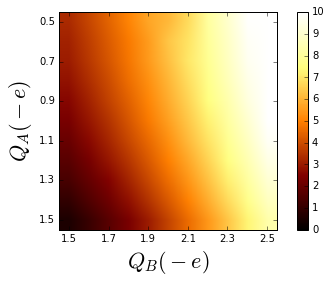

In [13]:
fig, ax = plt.subplots(1)

# plot just the positive data and save the
# color "mappable" object returned by ax1.imshow
pos = ax.imshow(two_d, cmap='afmhot', interpolation='bilinear', vmin=0, vmax=10)

# add the colorbar using the figure's method,
# telling which mappable we're talking about and
# which axes object it should be near
fig.colorbar(pos, ax=ax)
ax.set_xlabel('$Q_B (-e)$',size=22)
ax.set_ylabel('$Q_A (-e)$',size=22)


labelsB = ['0.4', '0.5', '0.7', '0.9', '1.1', '1.3', '1.5']
labelsA = ['1.4', '1.5', '1.7', '1.9', '2.1', '2.3', '2.5']

ax.set_xticklabels(labelsA)
ax.set_yticklabels(labelsB)

plt.tight_layout()
plt.savefig('Spacegroup_167_energies_C2.png')
plt.show()

In [12]:
print max(diff)
print min(diff)

10.926536135
0.569855795
